In [2]:
import pandas as pd
import os

#Reading the keypoints 
df = pd.read_csv('./keypoints.csv')

#Setting up the paths of the folders containing the images related to each keypoint so we can label them
dataset_path = './'
knee_path = os.path.join(dataset_path, './knee')
jeb_path = os.path.join(dataset_path, './jeb')
cross_path = os.path.join(dataset_path, './cross')
nomovement_path = os.path.join(dataset_path , './no_movement')


#Specifing the labels of each image based on the folder it is contained 
def get_label(image_name, knee_path, jeb_path, cross_path, nomovement_path):
    if image_name in os.listdir(knee_path):
        return 'knee'
    elif image_name in os.listdir(jeb_path):
        return 'jeb'
    elif image_name in os.listdir(cross_path):
        return 'cross'
    elif image_name in os.listdir(nomovement_path):
        return 'no_movement'
    else:
        return None  # If we cant find the image on the folders

# Add label column to our csv file and creating the dataset 
df['label'] = df['image_name'].apply(lambda x: get_label(x, knee_path, jeb_path, cross_path, nomovement_path))
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis='columns', inplace=True)
#df.to_csv(f'{dataset_path}dataset.csv', index=False)

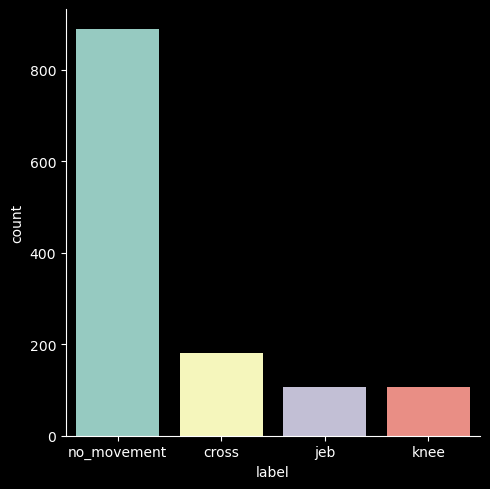

In [3]:
import seaborn as sns

sns.catplot(df, x='label', kind='count')